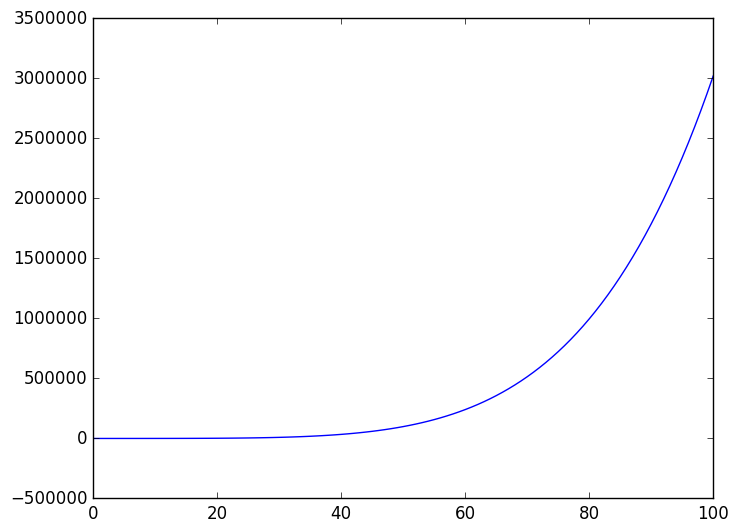

1

In [1]:
using PyPlot
#using PyCall
#unshift!(PyVector(pyimport("sys")["path"]), "")

#using PyCall
#unshift!(PyVector(pyimport("sys")["path"]), "")

#@pyimport gcvspline

#function Gspline(xfit::Array{Float64},yfit::Array{Float64},esefit::Array{Float64},xtarget::Array{Float64},smoothing::Float64;VAL = esefit.^2,splor=2,splm=3,nc = size(yfit,1))
#    c, wk, ier = gcvspline.gcvspline(xfit,yfit,smoothing.*ese,VAL,splmode=splm, splorder=splor,NC=nc) # gcvspl with mode 3 and smooth factor
#    out = gcvspline.splderivative(x,xfit,c,splorder=splor, L = 1,IDER = 0) 
#end

#@pyimport gcvspline

x = collect(0.0:1.0:100)
y = 2.0.*x.^2 - 100.0 + x +0.0003.*x.^5

plot(x,y)

ese = y./100

NN = length(y)
wx = 1. ./(ese.^2) # relative variance of observations
wy = zeros([1])+1. # systematic errors... not used so put them to 1
VAL = ese.^2

M = 2
N = length(x)
K = 1 # number of y columns
MD = 2 #spline mode
NC = length(y)

c = ones(NN,NC)
WK = Float64[1.,1.,1.,1.,1.,1.]
IER=1


In [6]:
#y = Gspline(x,y,ese,x,1.0)
#c, wk, ier = gcvspline.gcvspline(x,y,1.0.*ese,ese.^2,splmode=3, splorder=2,NC=size(y,1)) # gcvspl with mode 3 and smooth factor
#out = gcvspline.splderivative(x,x,c,splorder=2, L = 1,IDER = 0)

#with the c code:
ccall( (:gcvspl, "./libgcvspl.so"), Void, (Ptr{Float64},Ptr{Float64},Ptr{Float64},Cint,Cint,Ptr{Float64},Array{Float64},Ptr{Float64},Cint),x,y,wy,M,N,c,VAL,WK,IER)

In [8]:
c

101x101 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.

In [18]:
N = length(x)

101